In [2]:
import sys
sys.path.append('../')
import atlas

import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Custom chemical abundances

In this example, a synthetic spectrum is calculated from scratch for a star with the following parameters:

<table>
  <tr><td>Effective temperature, $T_\mathrm{eff}$</td><td>$6000\ \mathrm{K}$</td></tr>
  <tr><td>Surface gravity, $\log(g)$</td><td>$6.0$</td></tr>
  <tr><td>Helium mass fraction, $Y$</td><td>$0.4$</td></tr>
  <tr><td>Metallicity, $[\mathrm{M}/\mathrm{H}]$</td><td>$-1.4$ dex</td></tr>
  <tr><td>Lithium abundance, $[\mathrm{Li}/\mathrm{M}]$</td><td>$-3.0$ dex</td></tr>
  <tr><td>Carbon abundance, $[\mathrm{C}/\mathrm{M}]$</td><td>$-0.65$ dex</td></tr>
  <tr><td>Nitrogen abundance, $[\mathrm{N}/\mathrm{M}]$</td><td>$1.45$ dex</td></tr>
  <tr><td>Alpha enhancement, $[\alpha/\mathrm{M}]$</td><td>$0.6$ dex</td></tr>
</table>

Here alpha elements are oxygen, neon, magnesium, silicon, sulfur, argon, calcium and titanium. Start by constructing a default settings object:

In [3]:
settings = atlas.Settings()

All abundances in the table above are specified with respect to standard solar values. Display the solar composition adopted by `BasicATLAS`:

In [4]:
print(settings.abun_solar())

OrderedDict([('H', 12.0), ('He', 10.98), ('Li', 3.26), ('Be', 1.38), ('B', 2.79), ('C', 8.5), ('N', 7.86), ('O', 8.76), ('F', 4.56), ('Ne', 8.02), ('Na', 6.24), ('Mg', 7.6), ('Al', 6.45), ('Si', 7.51), ('P', 5.46), ('S', 7.16), ('Cl', 5.5), ('Ar', 6.4), ('K', 5.11), ('Ca', 6.34), ('Sc', 3.15), ('Ti', 4.95), ('V', 3.93), ('Cr', 5.64), ('Mn', 5.43), ('Fe', 7.52), ('Co', 4.99), ('Ni', 6.22), ('Cu', 4.19), ('Zn', 4.56), ('Ga', 3.04), ('Ge', 3.65), ('As', 2.3), ('Se', 3.34), ('Br', 2.54), ('Kr', 3.25), ('Rb', 2.36), ('Sr', 2.87), ('Y', 2.21), ('Zr', 2.62), ('Nb', 1.46), ('Mo', 1.88), ('Tc', -99.99), ('Ru', 1.75), ('Rh', 1.06), ('Pd', 1.65), ('Ag', 1.2), ('Cd', 1.71), ('In', 0.76), ('Sn', 2.04), ('Sb', 1.01), ('Te', 2.18), ('I', 1.55), ('Xe', 2.24), ('Cs', 1.08), ('Ba', 2.18), ('La', 1.1), ('Ce', 1.58), ('Pr', 0.72), ('Nd', 1.42), ('Pm', -99.99), ('Sm', 0.96), ('Eu', 0.52), ('Gd', 1.07), ('Tb', 0.3), ('Dy', 1.1), ('Ho', 0.48), ('Er', 0.92), ('Tm', 0.1), ('Yb', 0.92), ('Lu', 0.1), ('Hf', 0.87

Here all values are expressed as number densities with respect to hydrogen in dex, normalized such that the abundance of hydrogen is 12 dex. Input the settings:

In [5]:
settings.teff = 6000
settings.logg = 6.0
settings.Y = 0.4
settings.zscale = -1.4
settings.abun = {
    'Li': -3.0,
    'C': -0.65,
    'N': 1.45,
    'O': 0.6,
    'Ne': 0.6,
    'Mg': 0.6,
    'Si': 0.6,
    'S': 0.6,
    'Ar': 0.6,
    'Ca': 0.6,
    'Ti': 0.6,
}

## Opacity Distribution Functions

To run `ATLAS-9` with non-solar abundances we must first pre-tabulate opacity distribution functions (ODFs) with the satellite utility `DFSYNTHE`. We will use `~/DFSYNTHE_ODF` as the output directory. Make sure it does not already exist:

In [6]:
rm -rf ~/DFSYNTHE_ODF

Run `DFSYNTHE`:

In [7]:
run_dir = os.path.expanduser('~/DFSYNTHE_ODF')
atlas.dfsynthe(run_dir, settings)

Will run XNFDF to tabulate atomic and molecular number densities
Launcher created for 57 temperatures from 1995.0 K to 199526.0 K
/home/roman/DFSYNTHE_ODF/xnfpdf.dat
XNFDF halted
Will run DFSYNTHE to tabulate the ODFs (Opacity Distribution Functions)
1995.0 K done! (1/57)
2089.0 K done! (2/57)
2188.0 K done! (3/57)
2291.0 K done! (4/57)
2399.0 K done! (5/57)
2512.0 K done! (6/57)
2630.0 K done! (7/57)
2754.0 K done! (8/57)
2884.0 K done! (9/57)
3020.0 K done! (10/57)
3162.0 K done! (11/57)
3311.0 K done! (12/57)
3467.0 K done! (13/57)
3631.0 K done! (14/57)
3802.0 K done! (15/57)
3981.0 K done! (16/57)
4169.0 K done! (17/57)
4365.0 K done! (18/57)
4571.0 K done! (19/57)
4786.0 K done! (20/57)
5012.0 K done! (21/57)
5370.0 K done! (22/57)
5754.0 K done! (23/57)
6166.0 K done! (24/57)
6607.0 K done! (25/57)
7079.0 K done! (26/57)
7586.0 K done! (27/57)
8128.0 K done! (28/57)
8710.0 K done! (29/57)
9333.0 K done! (30/57)
10000.0 K done! (31/57)
11220.0 K done! (32/57)
12589.0 K done! (33/

`atlas.meta()` can be used to verify that the new set of calculated ODFs has correct abundances:

In [7]:
atlas.meta(run_dir)

{'Y': 0.4000050188874604,
 'abun': OrderedDict([('Li', -3.0),
              ('C', -0.65),
              ('N', 1.45),
              ('O', 0.6),
              ('Ne', 0.6),
              ('Mg', 0.6),
              ('Si', 0.6),
              ('S', 0.6),
              ('Ar', 0.6),
              ('Ca', 0.6),
              ('Ti', 0.6)]),
 'type': 'DFSYNTHE',
 'zscale': -1.400007822415902}

## Model

The model can then be calculated as usual except the new set of ODFs is passed to `atlas.atlas()` as an argument. We will carry out the model calculation in `~/ATLAS_LMHA_test`. Make sure the directory does not already exist:

In [8]:
rm -rf ~/ATLAS_LMHA_test

Run `ATLAS` with the new set of ODFs:

In [9]:
model_dir = os.path.expanduser('~/ATLAS_LMHA_test')
atlas.atlas(model_dir, settings, ODF = run_dir)

Launcher created
Starting automatic iterations...
15 iterations completed: max[abs(err)] = 2.975 | max[abs(de)] = 24.564
30 iterations completed: max[abs(err)] = 1.847 | max[abs(de)] = 2.675
45 iterations completed: max[abs(err)] = 1.391 | max[abs(de)] = 0.658
60 iterations completed: max[abs(err)] = 1.117 | max[abs(de)] = 0.339
75 iterations completed: max[abs(err)] = 0.916 | max[abs(de)] = 0.363
ATLAS-9 halted

Final convergence: max[abs(err)] = 0.916 | max[abs(de)] = 0.363
Saved the model in model.dat
Finished running ATLAS-9 in 0:03:13.874392 s


Finally calculate the synthetic spectrum using `SYNTHE`:

In [10]:
atlas.synthe(model_dir, 200, 2600)

Adapted the ATLAS-9 model to SYNTHE in output_synthe.out
Launcher created for wavelength range (200, 2600), batch 1. Expected number of points: 1538970 (buffer 2010001)
SYNTHE halted
Total data points: 1538970
Saved the spectrum in spectrum.dat
Finished running SYNTHE in 0:32:27.856874 s


Plot synthetic spectrum:

Text(0, 0.5, 'Intensity [erg s$^{-1}$ cm$^{-2}$ A$^{-1}$ strad$^{-1}$]')

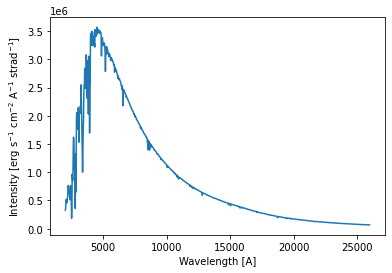

In [7]:
spectrum = atlas.read_spectrum(model_dir, num_bins = 1000)
plt.plot(spectrum['wl'], spectrum['flux'])

plt.xlabel('Wavelength [A]')
plt.ylabel('Intensity [erg s$^{-1}$ cm$^{-2}$ A$^{-1}$ strad$^{-1}$]')

Double check that the calculated model has the expected parameters with `atlas.meta()`:

In [8]:
atlas.meta(model_dir)

{'ODF_end': 337,
 'ODF_frequency_points': 337,
 'ODF_start': 1,
 'ODF_type': 'BIG',
 'Y': 0.4000050188874604,
 'abun': OrderedDict([('Li', -3.0),
              ('C', -0.65),
              ('N', 1.45),
              ('O', 0.6),
              ('Ne', 0.6),
              ('Mg', 0.6),
              ('Si', 0.6),
              ('S', 0.6),
              ('Ar', 0.6),
              ('Ca', 0.6),
              ('Ti', 0.6)]),
 'convection': 'OVER',
 'logg': 6.0,
 'mixlen': 1.25,
 'molecules': True,
 'nconv': 36,
 'nrhox': 72,
 'overshoot': 0.0,
 'restart': '/home/roman/ATLAS_LMHA_test/restart.dat',
 'synthe_cutoff': 0.0001,
 'synthe_lines': 82958621,
 'synthe_mode': 'Air',
 'synthe_nlte': False,
 'synthe_vturb': 0.0,
 'tau_min': -6.875,
 'tau_step': 0.125,
 'teff': 6000.0,
 'type': 'SYNTHE',
 'vturb': 2.0,
 'wl_res': 600000.0,
 'zscale': -1.400007822415902}